# HANC with a Welfare State

**Table of contents**<a id='toc0_'></a>    
- 1. [Setup](#toc1_)    
- 2. [Test 1: Solving and simulating the household problem](#toc2_)    
- 3. [Test 2: Evaluating the objective for finding the steady state](#toc3_)    
- 4. [Find stationary equilibrium](#toc4_)    
- 5. [Grid search](#toc5_)    
- 6. [Policy functions](#toc6_)    
- 7. [Simulation](#toc7_)    
- 8. [Test transition path](#toc8_)    
- 9. [Find transition path](#toc9_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [1]:
%load_ext autoreload
%autoreload 2

import time
import pickle
import numpy as np
from scipy import optimize
from scipy.optimize import minimize_scalar

import matplotlib.pyplot as plt   
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
plt.rcParams.update({"axes.grid" : True, "grid.color": "black", "grid.alpha":"0.25", "grid.linestyle": "--"})
plt.rcParams.update({'font.size': 14})

from HANCWelfareModel import HANCWelfareModelClass
from steady_state import obj_ss

from mpl_toolkits.mplot3d import Axes3D


## 1. <a id='toc1_'></a>[Setup](#toc0_)

In [2]:
model = HANCWelfareModelClass(name='baseline')

par = model.par
ss = model.ss
sol = model.sol
path = model.path

## 2. <a id='toc2_'></a>[Test 1: Solving and simulating the household problem](#toc0_)

We set all the steady values for the household problem manually at ad hoc values:

In [3]:
ss.r = 0.02*(1-0.1)
ss.wt = 1.00*(1-0.3)
ss.S = 0.0
ss.Chi = 0.1
ss.G = 0.4

model.solve_hh_ss(do_print=True)
model.simulate_hh_ss(do_print=True)


household problem in ss solved in 0.1 secs [334 iterations]
household problem in ss simulated in 1.4 secs [403 iterations]


In [4]:
par.Chi_ = 0.1
par.G_ = 0.4
model.find_ss(do_print=True)


starting at [3.8624]

 message: The solution converged.
 success: True
  status: 1
     fun: [ 1.262e-12 -1.186e-13]
       x: [ 3.257e+00  7.770e-01]
    nfev: 33
    fjac: [[-9.988e-01  4.817e-02]
           [-4.817e-02 -9.988e-01]]
       r: [-1.139e+01 -1.430e+01  1.405e+00]
     qtf: [-2.838e-09  1.244e-10]

steady state found in 5.0 secs
ss.K =  2.475
ss.A_hh =  2.475
ss.L =  1.160
ss.Y =  1.083
ss.r =  0.031
ss.w =  0.998
ss.clearing_A = 1.26e-12
ss.clearing_L = 0.00e+00
ss.clearing_Y = 2.65e-11


In [5]:
def print_ss():
    print(f'Steady state values:')
    for varname in model.varlist:
        print(f'{varname:15s}: {ss.__dict__[varname]:.4f}')
print_ss()

Steady state values:
K              : 2.4754
L_Y            : 0.7599
rK             : 0.1313
w              : 0.9976
Y              : 1.0830
A              : 2.4754
r              : 0.0313
tau            : 0.7770
wt             : 0.2225
L_G            : 0.4000
G              : 0.4000
Chi            : 0.1000
S              : 0.4000
Gamma_G        : 1.0000
A_hh           : 2.4754
C_hh           : 0.4355
ELL_hh         : 1.1758
L_hh           : 1.1599
INC_hh         : 0.4355
U_hh           : -5.7807
L              : 1.1599
I              : 0.2475
clearing_A     : 0.0000
clearing_L     : 0.0000
clearing_Y     : 0.0000
clearing_G     : -0.0000


In [6]:
model.test_path(in_place=True) 

shocks: G L_G Gamma_G 
unknowns: K L_Y 

blocks.production_firm
 rK               0.0e+00
 w                0.0e+00
 Y                0.0e+00
blocks.mutual_fund
 A                0.0e+00
 r                0.0e+00
blocks.government
 tau              0.0e+00
 wt               0.0e+00
 Chi              0.0e+00
 S                0.0e+00
hh
 A_hh             1.2e-09
 C_hh             3.4e-11
 ELL_hh           1.5e-10
 L_hh             1.3e-10
 INC_hh           8.6e-12
 U_hh             3.5e-10
blocks.market_clearing
 L                1.3e-10
 I                2.2e-16
 clearing_A       1.1e-09 [target]
 clearing_L       1.3e-10
 clearing_Y       3.4e-11
 clearing_G       9.8e-11 [target]


In [7]:
print(path.__dict__['clearing_Y'][:10])

[[2.64973599e-11]
 [2.57557309e-11]
 [2.50302001e-11]
 [2.43204346e-11]
 [2.36259901e-11]
 [2.29466446e-11]
 [2.22820651e-11]
 [2.16319185e-11]
 [2.09957607e-11]
 [2.03735917e-11]]


In [8]:
model.compute_jacs(do_print=True)

household Jacobians:
one step deviation from steady state calculated in 0.0 secs
curly_Y and curly_D calculated for Chi             in 0.2 secs
curly_Y and curly_D calculated for S               in 0.2 secs
curly_Y and curly_D calculated for r               in 0.2 secs
curly_Y and curly_D calculated for wt              in 0.2 secs
curly_E calculated in 0.8 secs
builiding blocks combined in 0.2 secs
household Jacobian computed in 1.7 secs

full Jacobians:
full Jacobian to unknowns computed in 0.4 secs [in evaluate_blocks(): 0.2 secs]
full Jacobian to shocks computed in 0.6 secs [in evaluate_blocks(): 0.3 secs]


In [9]:
model.find_transition_path(shocks=[],do_print=True)

finding the transition path:
 it =   0 -> max. abs. error = 1.15e-09
   1.15e-09 in clearing_A
   9.79e-11 in clearing_G
 it =   1 -> max. abs. error = 3.02e-14
   3.02e-14 in clearing_A
   1.69e-14 in clearing_G

transition path found in 0.5 secs


# Question 1 Stationary Equalibrium without gov 

### 1.1 Steady state values

In [10]:
par.G_ = 0.0
par.Chi_ = 0.0
model.find_ss(do_print=False)
print_ss()

Steady state values:
K              : 3.3887
L_Y            : 0.9225
rK             : 0.1207
w              : 1.0342
Y              : 1.3630
A              : 3.3887
r              : 0.0207
tau            : 0.0000
wt             : 1.0342
L_G            : 0.0000
G              : 0.0000
Chi            : 0.0000
S              : 0.0000
Gamma_G        : 1.0000
A_hh           : 3.3887
C_hh           : 1.0241
ELL_hh         : 0.9897
L_hh           : 0.9225
INC_hh         : 1.0241
U_hh           : -100000001.6179
L              : 0.9225
I              : 0.3389
clearing_A     : 0.0000
clearing_L     : 0.0000
clearing_Y     : 0.0000
clearing_G     : 0.0000


In [11]:
def udskriv():
    with open('output_table.tex', 'w') as file:
        file.write("\\begin{tabular}{l r}\n")
        file.write("\\hline\n")
        file.write("Variable Name & Value \\\\\n")
        file.write("\\hline\n")
        for varname in model.varlist:
            file.write(f'{varname} & {ss.__dict__[varname]:.2f} \\\\\n')
        file.write("\\hline\n")
        file.write("\\end{tabular}\n")
#udskriv()

### 1.2 Policy functions

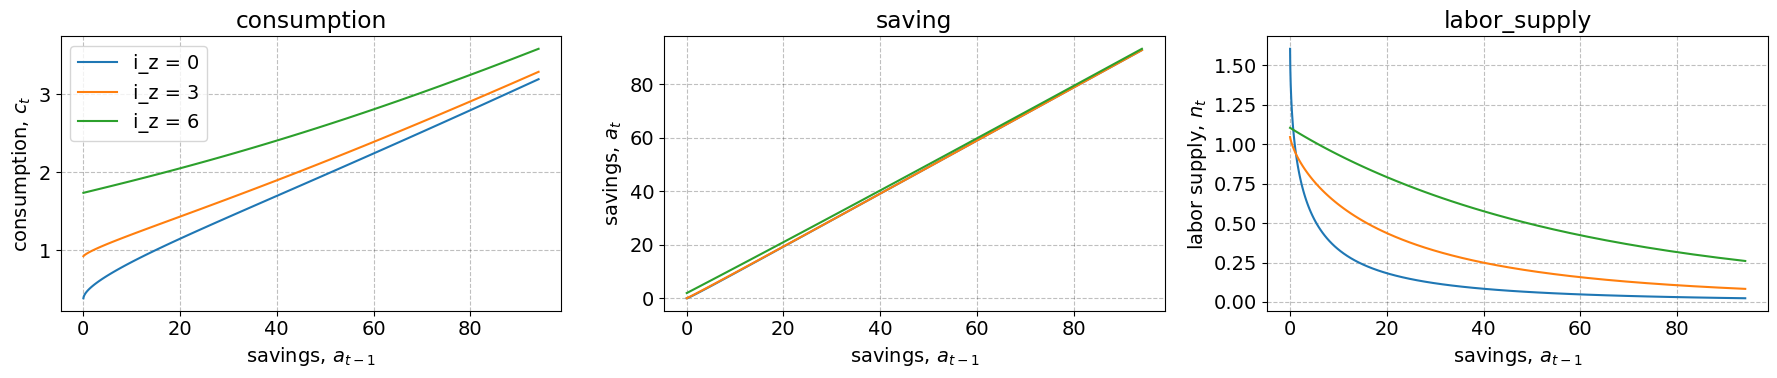

In [12]:
i_fix = 0

fig = plt.figure(figsize=(18,4),dpi=100)
a_max = 100

# a. consumption
I = par.a_grid < a_max

ax = fig.add_subplot(1,3,1)
ax.set_title(f'consumption')

for i_z in [0,par.Nz//2,par.Nz-1]:
    ax.plot(par.a_grid[I],ss.c[i_fix,i_z,I],label=f'i_z = {i_z}')

ax.legend(frameon=True)
ax.set_xlabel('savings, $a_{t-1}$')
ax.set_ylabel('consumption, $c_t$')

# b. saving
I = par.a_grid < a_max

ax = fig.add_subplot(1,3,2)
ax.set_title(f'saving')

for i_z in [0,par.Nz//2,par.Nz-1]:
    ax.plot(par.a_grid[I],ss.a[i_fix,i_z,I],label=f'i_z = {i_z}')

ax.set_xlabel('savings, $a_{t-1}$')
ax.set_ylabel('savings, $a_{t}$')

# c. labor supply
I = par.a_grid < a_max

ax = fig.add_subplot(1,3,3)
ax.set_title(f'labor_supply')

for i_z in [0,par.Nz//2,par.Nz-1]:
    ax.plot(par.a_grid[I],ss.ell[i_fix,i_z,I],label=f'i_z = {i_z}')

ax.set_xlabel('savings, $a_{t-1}$')
ax.set_ylabel('labor supply, $n_{t}$')


fig.tight_layout()
#save figure
#fig.savefig('figs/fig_policy.png', bbox_inches='tight')

plt.show()

### 1.3 Distribution in ss 

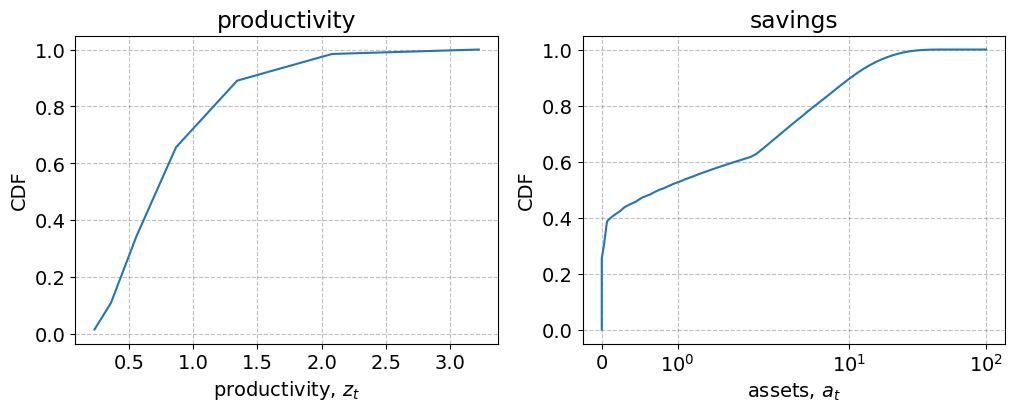

In [13]:
fig = plt.figure(figsize=(12,4),dpi=100)

# a. income
ax = fig.add_subplot(1,2,1)
ax.set_title('productivity')

y = np.cumsum(np.sum(ss.D,axis=(0,2)))
ax.plot(par.z_grid,y/y[-1])

ax.set_xlabel('productivity, $z_{t}$')
ax.set_ylabel('CDF')

# b. assets
ax = fig.add_subplot(1,2,2)
ax.set_title('savings')
y = np.insert(np.cumsum(np.sum(ss.D,axis=(0,1))),0,0.0)
ax.plot(np.insert(par.a_grid,0,par.a_grid[0]),y/y[-1])
        
ax.set_xlabel('assets, $a_{t}$')
ax.set_ylabel('CDF')
ax.set_xscale('symlog')

#save figure
#fig.savefig('figs/fig_distribution.png', bbox_inches='tight')
plt.show()

### 1.4 Expected discounted utility

shocks: G L_G Gamma_G 
unknowns: K L_Y 

blocks.production_firm
 rK               0.0e+00
 w                0.0e+00
 Y                0.0e+00
blocks.mutual_fund
 A                0.0e+00
 r                0.0e+00
blocks.government
 tau              0.0e+00
 wt               0.0e+00
 Chi              0.0e+00
 S                0.0e+00
hh
 A_hh             6.8e-10
 C_hh             2.0e-11
 ELL_hh           3.1e-11
 L_hh             2.6e-11
 INC_hh           1.2e-11
 U_hh             7.2e-07
blocks.market_clearing
 L                2.6e-11
 I                5.6e-17
 clearing_A       6.8e-10 [target]
 clearing_L       2.6e-11
 clearing_Y       2.0e-11
 clearing_G       0.0e+00 [target]
Utility: -100000001.6179


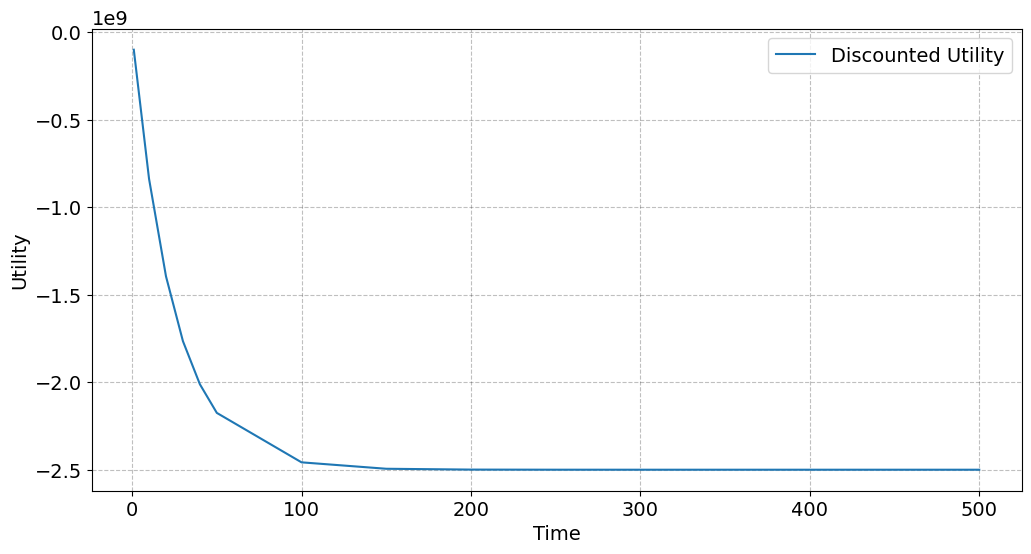

In [14]:
model.test_path(in_place=True)

#Ploting the accumulation discounted utility
#par.T = 500
time_ = [1, 10, 20, 30, 40, 50,  100, 150, 200, 250, 300, 350, 400, 450, 500]

#time_ = [1, 10, 100, 150, 200, 250, 300, 350, 400, 450, 500]


time_past = []
disc_utility = []
for i in time_:
    par.T = i 
    time_past.append(i)
    U =np.sum([par.beta**t * np.sum(path.u[t]*path.D[t]/np.sum(path.D[t])) for t in range(par.T)])
    disc_utility.append(U)


print(f'Utility: {disc_utility[-0]:.4f}')

#figure 
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(1,1,1)
ax.plot(time_past, disc_utility, label='Discounted Utility')
ax.set_xlabel('Time')
ax.set_ylabel('Utility')
ax.legend()

# save figure
#fig.savefig('figs/fig_disc_utility.png', bbox_inches='tight')
#print(disc_utility)
plt.show()



# 2. Optimal welfare policies 1 (no transfers)

### 2.1 Defining new functions

In [15]:
# New objetctiv function 
def u_gov(x):
    """ss discounted sum of utility  given government level"""
    par.G_ = x
    model.find_ss(do_print=False)

    #model.find_transition_path(shocks=[],do_print=False)
    model.test_path(in_place=False) 
    model.compute_jacs(do_print=False)
    model.find_transition_path(shocks=[],do_print=False)

    U =np.sum([par.beta**t * np.sum(path.u[t]*path.D[t]/np.sum(path.D[t])) for t in range(par.T)])
    
    return U

def obj_gov(x):
    """Objective function with government as the choice variable"""
    return - u_gov(x)

#u_gov(0.1)

### 2.2 Function for calculations

In [16]:
# Optimize the objective function within the specified range
par.Chi_ = 0.0

result = minimize_scalar( obj_gov, bounds=(0.33, 0.5), method='bounded')

# Print the optimization result
print(f"Optimal value of x: { result.x}, given Chi = {ss.Chi}")
print(f"Optimal objective function value: {- result.fun}")
print(f"G/Y at the optimal level of G : {ss.G/ss.Y}")


shocks: G L_G Gamma_G 
unknowns: K L_Y 

blocks.production_firm
 rK               0.0e+00
 w                0.0e+00
 Y                0.0e+00
blocks.mutual_fund
 A                0.0e+00
 r                0.0e+00
blocks.government
 tau              0.0e+00
 wt               0.0e+00
 Chi              0.0e+00
 S                0.0e+00
hh
 A_hh             8.5e-10
 C_hh             2.2e-11
 ELL_hh           9.3e-11
 L_hh             7.5e-11
 INC_hh           4.9e-12
 U_hh             2.0e-10
blocks.market_clearing
 L                7.5e-11
 I                1.1e-16
 clearing_A       4.6e-09 [target]
 clearing_L       7.5e-11
 clearing_Y       2.2e-11
 clearing_G       7.0e-10 [target]
shocks: G L_G Gamma_G 
unknowns: K L_Y 

blocks.production_firm
 rK               0.0e+00
 w                0.0e+00
 Y                0.0e+00
blocks.mutual_fund
 A                0.0e+00
 r                0.0e+00
blocks.government
 tau              0.0e+00
 wt               0.0e+00
 Chi              0.0e+00


In [17]:
def calc_chi(chi):
    par.Chi_ = chi
    g_values = [0.36, 0.39, 0.4, 0.42, 0.45, 0.475]
    u_values = [u_gov(x) for x in g_values]

    result = minimize_scalar(obj_gov, bounds=(0.36, 0.475), method='bounded')

    Chi_val = ss.Chi
    Gov_val = result.x
    U_val = -result.fun
    Y_G_relatio = ss.G/ss.Y

    # Creating a dictionary to hold the results
    result_dict = {
        'Chi_val': Chi_val,
        'Gov_opt': Gov_val,
        'U_opt': U_val,
        'Y_G_relatio': Y_G_relatio,
        'g_values': g_values,
        'u_values': u_values
    }  
    return result_dict

chi_results = {}

# Populate the outer dictionary
chi_values = [-0.35, -0.3, -0.25, -0.2, -0.22, -0.15, -0.1, -0.05, 0.0, 0.05]  # List of chi values to compute
for chi in chi_values:
    chi_results[str(chi)] = calc_chi(chi)


shocks: G L_G Gamma_G 
unknowns: K L_Y 

blocks.production_firm
 rK               0.0e+00
 w                0.0e+00
 Y                0.0e+00
blocks.mutual_fund
 A                0.0e+00
 r                0.0e+00
blocks.government
 tau              0.0e+00
 wt               0.0e+00
 Chi              0.0e+00
 S                0.0e+00
hh
 A_hh             7.5e-10
 C_hh             1.6e-11
 ELL_hh           5.5e-11
 L_hh             4.4e-11
 INC_hh           2.0e-11
 U_hh             1.1e-10
blocks.market_clearing
 L                4.4e-11
 I                5.6e-17
 clearing_A       7.5e-10 [target]
 clearing_L       4.4e-11
 clearing_Y       1.6e-11
 clearing_G       1.2e-11 [target]
shocks: G L_G Gamma_G 
unknowns: K L_Y 

blocks.production_firm
 rK               0.0e+00
 w                0.0e+00
 Y                0.0e+00
blocks.mutual_fund
 A                0.0e+00
 r                0.0e+00
blocks.government
 tau              0.0e+00
 wt               0.0e+00
 Chi              0.0e+00


/Users/emmagundersen/Library/Mobile Documents/com~apple~CloudDocs/KU/9 semester/Het_assignments/Assignment_2/Assignment_II/steady_state.py:90: RuntimeWarning: invalid value encountered in double_scalars
  ss.Y = par.Gamma_Y*ss.K**(par.alpha)*ss.L_Y**(1-par.alpha) # Total privat production


shocks: G L_G Gamma_G 
unknowns: K L_Y 

blocks.production_firm
 rK               0.0e+00
 w                2.2e-16
 Y                0.0e+00
blocks.mutual_fund
 A                0.0e+00
 r                0.0e+00
blocks.government
 tau              0.0e+00
 wt               5.6e-17
 Chi              0.0e+00
 S                0.0e+00
hh
 A_hh             1.1e-09
 C_hh             3.0e-11
 ELL_hh           1.5e-10
 L_hh             1.2e-10
 INC_hh           3.1e-12
 U_hh             3.5e-10
blocks.market_clearing
 L                1.2e-10
 I                2.8e-16
 clearing_A       1.0e-09 [target]
 clearing_L       1.2e-10
 clearing_Y       3.0e-11
 clearing_G       8.8e-11 [target]
shocks: G L_G Gamma_G 
unknowns: K L_Y 

blocks.production_firm
 rK               0.0e+00
 w                0.0e+00
 Y                0.0e+00
blocks.mutual_fund
 A                0.0e+00
 r                0.0e+00
blocks.government
 tau              0.0e+00
 wt               0.0e+00
 Chi              0.0e+00


In [18]:

with open('output_gov_chi.tex', 'w') as file:
    file.write("\\begin{tabular}{c c c c}\n")
    file.write("\\hline\n")
    file.write("Chi & Government & U & Y/G \\\\\n")
    file.write("\\hline\n")
    for i in chi_results.keys():
        file.write(f"{chi_results[f'{i}']['Chi_val']} & {chi_results[f'{i}']['Gov_opt']:.3f} & {chi_results[f'{i}']['U_opt']:.3f} & {chi_results[f'{i}']['Y_G_relatio']:.3f} \\\\\n")
    file.write("\\hline\n")
    file.write("\\end{tabular}\n")

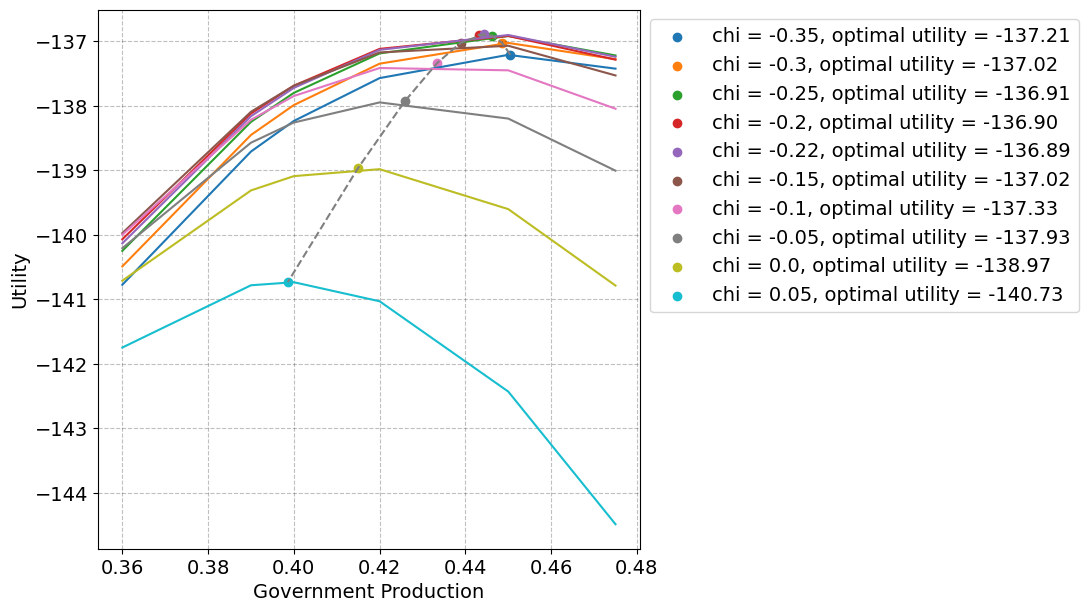

In [19]:


# Assuming chi_results is defined and populated as before

fig = plt.figure(figsize=(7, 7), dpi=100)
ax = fig.add_subplot(1, 1, 1)
ax.set_title('')

opt_gov_values = []
opt_u_values = []

for i in chi_results.keys():
    ax.plot(chi_results[i]['g_values'], chi_results[i]['u_values'])
    ax.scatter(chi_results[i]['Gov_opt'], chi_results[i]['U_opt'], marker='o', label=f'chi = {i}, optimal utility = {chi_results[i]["U_opt"]:.2f}')
    opt_gov_values.append(chi_results[i]['Gov_opt'])
    opt_u_values.append(chi_results[i]['U_opt'])

# Plotting the line connecting optimal points
ax.plot(opt_gov_values, opt_u_values, color='grey', linestyle='--', marker='')

ax.set_xlabel('Government Production')
ax.set_ylabel('Utility')
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.show()
fig.savefig('figs/verdens_bedste.png', bbox_inches='tight')


# 3. Find optimal welfare policies II (with transfers)

### 3.1 Table with chi and --- 

In [24]:
# New objetctiv function 
def u_gov_chi(x):
    """ss discounted sum of utility  given government level"""
    par.G_ = x[0]
    par.Chi_ = x[1]

    model.find_ss(do_print=False)

    #model.find_transition_path(shocks=[],do_print=False)
    model.test_path(in_place=False) 
    model.compute_jacs(do_print=False)
    model.find_transition_path(shocks=[],do_print=False)

    U =np.sum([par.beta**t * np.sum(path.u[t]*path.D[t]/np.sum(path.D[t])) for t in range(par.T)])
    
    return - U

In [25]:
x0 = [0.5, -0.2]

u_gov_chi(x)


shocks: G L_G Gamma_G 
unknowns: K L_Y 

blocks.production_firm
 rK               0.0e+00
 w                0.0e+00
 Y                0.0e+00
blocks.mutual_fund
 A                0.0e+00
 r                0.0e+00
blocks.government
 tau              0.0e+00
 wt               0.0e+00
 Chi              0.0e+00
 S                0.0e+00
hh
 A_hh             8.3e-10
 C_hh             1.8e-11
 ELL_hh           8.8e-11
 L_hh             7.0e-11
 INC_hh           1.4e-11
 U_hh             2.0e-10
blocks.market_clearing
 L                7.0e-11
 I                1.1e-16
 clearing_A       8.2e-10 [target]
 clearing_L       7.0e-11
 clearing_Y       1.8e-11
 clearing_G       3.8e-11 [target]


138.085516532517

In [26]:
result = optimize.minimize(u_gov_chi, x0, method='Nelder-Mead')

shocks: G L_G Gamma_G 
unknowns: K L_Y 

blocks.production_firm
 rK               0.0e+00
 w                0.0e+00
 Y                0.0e+00
blocks.mutual_fund
 A                0.0e+00
 r                0.0e+00
blocks.government
 tau              0.0e+00
 wt               0.0e+00
 Chi              0.0e+00
 S                0.0e+00
hh
 A_hh             8.3e-10
 C_hh             1.8e-11
 ELL_hh           8.8e-11
 L_hh             7.0e-11
 INC_hh           1.4e-11
 U_hh             2.0e-10
blocks.market_clearing
 L                7.0e-11
 I                1.1e-16
 clearing_A       8.2e-10 [target]
 clearing_L       7.0e-11
 clearing_Y       1.8e-11
 clearing_G       3.8e-11 [target]
shocks: G L_G Gamma_G 
unknowns: K L_Y 

blocks.production_firm
 rK               0.0e+00
 w                0.0e+00
 Y                0.0e+00
blocks.mutual_fund
 A                0.0e+00
 r                0.0e+00
blocks.government
 tau              0.0e+00
 wt               0.0e+00
 Chi              0.0e+00


In [29]:
result.fun

136.88928471358295

 
 Løsning: 
 
 message: Solution found.
 success: True
  status: 0
     fun: 136.88928464017815
       x: -0.21819642050038354
     nit: 8
    nfev: 8

In [ ]:
# Optimize the objective function within the specified range
par.Chi_ = results.x

result_2 = minimize_scalar( obj_gov, bounds=(0.43, 0.46), method='bounded')

# Print the optimization result
print(f"Optimal value of x: { result_2.x}, given Chi = {ss.Chi}")
print(f"Optimal objective function value: {- result_2.fun}")
print(f"G/Y at the optimal level of G : {ss.G/ss.Y}")
print(f'G = {ss.G}')

In [ ]:
print(f'G = {ss.G}')

### 3.2 Plotting the utility for given values of chi and G 

KeyError: '-0.5'

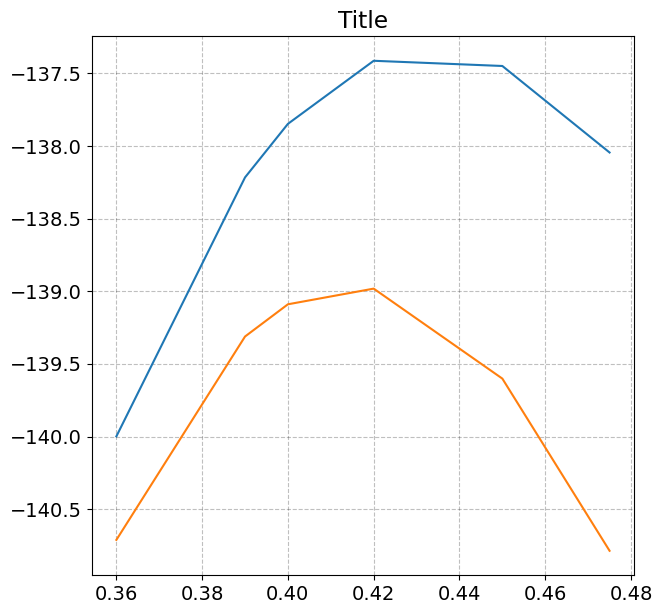

In [20]:
fig = plt.figure(figsize=(7, 7), dpi=100)
ax = fig.add_subplot(1, 1, 1)
ax.set_title('Title')

# Plot function for chi = 0 
ax.plot(chi_results['-0.1']['g_values'], chi_results['-0.1']['u_values'], label='Chi = -0.1')
ax.plot(chi_results['0.0']['g_values'], chi_results['0.0']['u_values'], label='Chi = 0')
#ax.plot(chi_results['0.1']['g_values'], chi_results['0.1']['u_values'], label='Chi = 0.1')
ax.plot(chi_results['-0.5']['g_values'], chi_results['-0.5']['u_values'], label='Chi = -0.5')
ax.set_xlabel('Government production')
ax.set_ylabel('Discounted expected utility')
ax.set_title('Plot of Objective Function')
ax.grid(True)
ax.legend()


# Optimal government consumption
ax.scatter(chi_results['-0.1']['Gov_opt'], chi_results['-0.1']['U_opt'], color='red', label='Optimal government consumption', marker='o')
ax.scatter(chi_results['0.0']['Gov_opt'], chi_results['0.0']['U_opt'], color='red', marker='o')
#ax.scatter(chi_results['0.1']['Gov_opt'], chi_results['0.1']['U_opt'], color='red', marker='o')
ax.legend()

# Gather optimal points for plotting the line
#opt_gov_values = [chi_results[chi]['Gov_opt'] for chi in ['-0.1', '0.0', '0.1']]
#opt_u_values = [chi_results[chi]['U_opt'] for chi in ['-0.1', '0.0', '0.1']]

# Plotting the line connecting optimal points
#ax.plot(opt_gov_values, opt_u_values, color='blue', linestyle='-', marker='o', label='Optimal Path')


#fig.savefig('figs/fig_opt_gov.png', bbox_inches='tight')

### 3.3 plot of \chi and G (3D)

# 4 Increased TFP 

In [ ]:
#Copy the steady state values
ini_ = model.ss.__dict__.copy()



# STOP 

In [ ]:
# Error  RuntimeWarning: invalid value encountered in double_scalars
# Create the figure and subplots
fig = plt.figure(figsize=(10, 10), dpi=100)

#
ax = fig.add_subplot(1, 1, 1)
ax.set_title('Productivity')


g_values = np.linspace(0.3, 0.5, 20)
u_values = [u_gov(x) for x in g_values]


# Plot the objective function
ax.plot(g_values, u_values, label='Objective Function')
ax.set_xlabel('Government production')
ax.set_ylabel('Discounted expected utility')
ax.set_title('Plot of Objective Function')
ax.grid(True)
ax.legend()

# Plot the minimum point
ax.scatter(result.x, u_gov(result.x), color='red', label='Optimal government consumption', marker='o')
ax.legend()

# Save figure
fig.savefig('figs/fig_optimal_G.png', bbox_inches='tight')

# Show the figure
plt.show()


## Question 3

In [ ]:
# Optimize the objective function within the specified range
par.Chi_ss = 0.05

result = minimize_scalar( obj_gov, bounds=(0.375, 0.45), method='bounded')

# Print the optimization result
print(f"Optimal value of x: {- result.x}, given Chi = {ss.Chi}")
print(f"Optimal objective function value: {- result.fun}")

# G/Y in the steady state
# PROBLEM - G in the steady state: 1.22 skal være 0.41493
print(f"G/Y in the steady state: {ss.G/ss.Y}")
print(f"L_G in the steady state: {ss.L_G}")
print(f"G in the steady state: {ss.Y}")
print(f"Y in the steady state: {ss.Gamma_G}")
print(f'S in the steady state: {ss.S}')
print(f'Chi in the steady state: {ss.Chi}')
print(f'U_hh in the steady state: {ss.U_hh}')
print(f'G_ss in the steady state: {par.G_ss}')

In [ ]:
# Error  RuntimeWarning: invalid value encountered in double_scalars
# Create the figure and subplots
fig = plt.figure(figsize=(10, 10), dpi=100)

#
ax = fig.add_subplot(1, 1, 1)
ax.set_title('Productivity')

g_values = np.linspace(0.3, 0.5, 10)
u_values = [u_gov(x) for x in g_values]


# Plot the objective function
ax.plot(g_values, u_values, label='Objective Function')
ax.set_xlabel('Government production')
ax.set_ylabel('Discounted expected utility')
ax.set_title('Plot of Objective Function')
ax.grid(True)
ax.legend()

# Plot the minimum point
ax.scatter(result.x, u_gov(result.x), color='red', label='Optimal government consumption', marker='o')
ax.legend()

# Save figure
#fig.savefig(f'figs/fig_optimal_G_{ss.Chi}.png', bbox_inches='tight')

# Show the figure
plt.show()


In [ ]:
# Define Chi and G values more densely for a smooth surface
#Chi_values = np.linspace(0.0, 0.1, 2)  # Increased number of points for smoothness
#G_values = np.linspace(0.4, 0.4, 2)


# Create a meshgrid
#Chi_grid, G_grid = np.meshgrid(Chi_values, G_values)

print(f'Chi_grid: {Chi_grid}')
print(f'Chi_grid: {G_grid}')
print(f'U_grid: {U_grid}')

In [ ]:
# Define Chi and G values more densely for a smooth surface
Chi_values = np.linspace(0.0, 0.1, 2)  # Increased number of points for smoothness
G_values = np.linspace(0.4, 0.4, 2)


# Create a meshgrid
Chi_grid, G_grid = np.meshgrid(Chi_values, G_values)

# Initialize an empty grid for U values
U_grid = np.zeros_like(Chi_grid)

# Compute U values for each combination of Chi and G
for i in range(Chi_grid.shape[0]):
    for j in range(G_grid.shape[1]):

        par.Chi_ss = Chi_grid[i, j]
        par.G_ss = G_grid[i, j]
        model.find_ss(do_print=False)
        U_grid[i, j] = ss.U_hh

In [ ]:
# Plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Surface plot with color based on U values
surface = ax.plot_surface(Chi_grid, G_grid, U_grid, cmap='viridis')

# Adding a color bar
cbar = plt.colorbar(surface)
cbar.set_label('U values')

# Labeling axes
ax.set_xlabel('Chi')
ax.set_ylabel('G')
ax.set_zlabel('U')

# Show plot
plt.show()

# 3. Optimal welfare policies 2 (with transfers)

In [ ]:

# Define Chi and G values more densely for a smooth surface
#Chi_values = np.linspace(0.0, 0.1, 5)  # Increased number of points for smoothness
#G_values = np.linspace(0.3, 0.5, 5)

# Create a meshgrid
#Chi_grid, G_grid = np.meshgrid(Chi_values, G_values)

# Initialize an empty grid for U values
#U_grid = np.zeros_like(Chi_grid)

# Compute U values for each combination of Chi and G
#for i in range(Chi_grid.shape[0]):
#    for j in range(G_grid.shape[1]):
#        par.Chi_ = Chi_grid[i, j]
#        par.G_ = G_grid[i, j]
#        model.find_ss(do_print=False)
#        U_grid[i, j] = ss.U_hh

# Plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Surface plot with color based on U values
surface = ax.plot_surface(Chi_grid, G_grid, U_grid, cmap='viridis')

# Adding a color bar
cbar = plt.colorbar(surface)
cbar.set_label('U values')

# Labeling axes
ax.set_xlabel('Chi')
ax.set_ylabel('G')
ax.set_zlabel('U')

# Show plot
plt.show()


In [ ]:
from mpl_toolkits.mplot3d import Axes3D

# ... [your code to compute Chi_list, G_list, U_list] ...

# Plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with color based on U values
scatter = ax.scatter(Chi_list, G_list, U_list, c=U_list, cmap='viridis')

# Adding a color bar
cbar = plt.colorbar(scatter)
cbar.set_label('U values')

# Labeling axes
ax.set_xlabel('Chi')
ax.set_ylabel('G')
ax.set_zlabel('U')

# Show plot
plt.show()